In [1]:
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
with open("/mnt/1230_env_collected_data/fixed_scene_from_1230env/static_scenes_with_obj_pos.pkl", 'rb') as f:
    data = pickle.load(f)
train_data = data[:90]
val_data = data[90:]

In [2]:
# all_diffs = dict()
# obj_name = []
# for k, _ in data[0].items():
#     obj_name.append(k)
# for obj in obj_name:
#     diffs = []
#     for i, d in enumerate(data):
#         pos_i = np.array(d[obj][:3])
#         for j in range(i+1, len(data)):
#             pos_j = np.array(data[j][obj][:3])
#             diff = np.power((pos_i - pos_j), 2).sum()
#             diffs.append(diff)
#     all_diffs[obj] = np.array(diffs)
# df = pd.DataFrame(columns = ['Object','diff'])

# for key, value in all_diffs.items():
#     for v in value:
#         obj_df = pd.DataFrame({'Object': [key],
#                                 'diff': [v]})
#         df = pd.concat([df, obj_df], ignore_index = True)

# fig, ax = plt.subplots()
# sns.violinplot(ax = ax,
#                data = df,
#                x = 'Object',
#                y = 'diff',
#                hue = 'Object',)
# plt.show()


In [3]:
all_diffs = dict()
obj_name = []
for k, _ in data[0].items():
    obj_name.append(k)
for obj in obj_name:
    diffs = dict()
    
    train_diffs = []
    for i, d in enumerate(train_data):
        pos_i = np.array(d[obj][:3])
        for j in range(i+1, len(train_data)):
            pos_j = np.array(train_data[j][obj][:3])
            diff = np.power((pos_i - pos_j), 2).sum()
            train_diffs.append(diff)
    diffs['train'] = np.array(train_diffs)
    print(obj+'_train: mean=', diffs['train'].mean().round(4), ' std=', diffs['train'].std().round(4))
            
    val_diffs = []
    for i, d in enumerate(val_data):
        pos_i = np.array(d[obj][:3])
        for j in range(i+1, len(val_data)):
            pos_j = np.array(val_data[j][obj][:3])
            diff = np.power((pos_i - pos_j), 2).sum()
            val_diffs.append(diff)
    diffs['val'] = np.array(val_diffs)
    print(obj+'_val: mean=', diffs['val'].mean().round(4), ' std=', diffs['val'].std().round(4))
    
    all_diffs[obj] = diffs

banana_train: mean= 0.0297  std= 0.0296
banana_val: mean= 0.0347  std= 0.0341
apple_train: mean= 0.037  std= 0.0356
apple_val: mean= 0.032  std= 0.029
trash_beer_train: mean= 0.0407  std= 0.0374
trash_beer_val: mean= 0.0478  std= 0.0424
cube_train: mean= 0.0362  std= 0.0359
cube_val: mean= 0.0359  std= 0.0334
coke_train: mean= 0.0458  std= 0.0415
coke_val: mean= 0.046  std= 0.0415
beer_can_train: mean= 0.0455  std= 0.0406
beer_can_val: mean= 0.0492  std= 0.0423


In [4]:
cross_diff = dict()
x = 0
for i, d_val in enumerate(val_data):
    num_similar = 0
    diffss = dict()
    y = []
    for j, d_train in enumerate(train_data):
        diffs = dict()
        flag = 0
        for obj in obj_name:
            pos_i = np.array(d_val[obj][:3])
            pos_j = np.array(d_train[obj][:3])
            diff = np.power((pos_i - pos_j), 2).sum()
            diffs[obj] = diff
            if diff < 0.03:
                flag += 1
        if flag == 6:
            diffs['is_similar'] = True
            num_similar += 1
            y.append(j)
        else:
            diffs['is_similar'] = False
        diffss['with_train_{}'.format(j)] = diffs
    diffss['num_similar'] = num_similar
    print('val_{}: '.format(i), num_similar, y)
    # if num_similar >= 1:
    #     print(i)
    cross_diff['val_{}'.format(i)] = diffss

val_0:  2 [42, 51]
val_1:  2 [44, 88]
val_2:  5 [20, 21, 49, 55, 77]
val_3:  6 [5, 23, 40, 55, 56, 57]
val_4:  1 [67]
val_5:  2 [17, 80]
val_6:  1 [5]
val_7:  4 [16, 35, 53, 62]
val_8:  6 [15, 22, 29, 36, 65, 71]
val_9:  4 [19, 28, 35, 39]
val_10:  4 [21, 44, 49, 88]
val_11:  1 [3]
val_12:  3 [7, 25, 29]
val_13:  3 [19, 46, 61]
val_14:  2 [45, 78]
val_15:  1 [21]
val_16:  4 [9, 42, 58, 86]
val_17:  0 []
val_18:  1 [46]
val_19:  2 [9, 38]


In [5]:
df = pd.DataFrame(columns = ['Object', 'mode', 'diff'])

for key, value in all_diffs.items():
    for k, v in value.items():
        for i in v:
            obj_df = pd.DataFrame({'Object': [key],
                                'mode': [k],
                                'diff': [i]})
            df = pd.concat([df, obj_df], ignore_index = True)
df

/tmp/ipykernel_1946852/1643327376.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, obj_df], ignore_index = True)


,Object,mode,diff
0,banana,train,0.048490
1,banana,train,0.128661
2,banana,train,0.029226
3,banana,train,0.092049
4,banana,train,0.088731
...,...,...,...
25165,beer_can,val,0.046717
25166,beer_can,val,0.020491
25167,beer_can,val,0.023490
25168,beer_can,val,0.116797


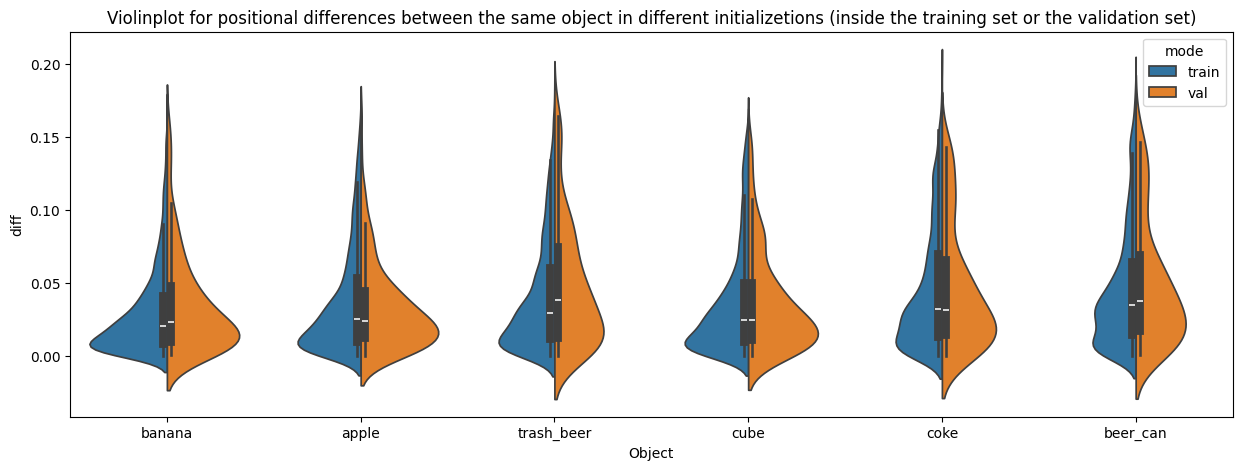

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(ax=ax,
               data=df,
               x='Object',
               y='diff',
               hue='mode',
               split=True,)
plt.title('Violinplot for positional differences between the same object in different initializetions (inside the training set or the validation set)')
plt.show()